In [4]:

import pandas as pd

dfCases = pd.read_csv("https://api.vitaldb.net/cases")  # clinical information
dfTrack = pd.read_csv("https://api.vitaldb.net/trks")  # track list
dflabs = pd.read_csv('https://api.vitaldb.net/labs')  # laboratory results

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import minkowski
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

def a1(dfCases):
    # Calculate the distance between the centroids of height and weight
    num = dfCases.select_dtypes(exclude=["object"])
    height_centroid = num["height"].mean(axis=0)
    weight_centroid = num["weight"].mean(axis=0)
    height_spread = num["height"].std(axis=0)
    weight_spread = num["weight"].std(axis=0)
    # Calculate the distance between the centroids of height and weight
    distance = np.abs(height_centroid - weight_centroid)
    return distance,height_centroid,weight_centroid,height_spread,weight_spread



def a2(dfCases):
    # Calculate the duration of surgery
    dfCases["op_duration"] = dfCases["opend"] - dfCases["opstart"]
    # Create a new column to classify the duration of surgery
    threshold_minutes = 240*60
    dfCases['surgery_duration_class'] = dfCases['op_duration'].apply(lambda x: 'long' if x > threshold_minutes else 'short')
    plt.figure(figsize=(10, 6))
    plt.hist(dfCases['surgery_duration_class'])
    plt.xlabel('Surgery Duration Class')
    plt.ylabel('Frequency')
    plt.title('Histogram of Surgery Duration Class')
    plt.show()
    return dfCases["op_duration"].mean(), dfCases["op_duration"].var()

def a3(dfCases):
    vector_1 = dfCases.iloc[0, :10].values
    vector_2 = dfCases.iloc[3, :10].values
    minkowski_distances = []
    for r in range(1, 11):
        distance = minkowski(vector_1, vector_2, r)
        minkowski_distances.append(distance)
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, 11), minkowski_distances, marker='o')
    plt.xlabel('Value of r')
    plt.ylabel('Minkowski Distance')
    plt.title('Minkowski Distance vs. r')
    plt.grid(True)
    plt.show()
    return minkowski_distances

def a4(dfCases):
    X = dfCases[['opstart', 'opend', 'op_duration']]
    y = dfCases['surgery_duration_class']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    return X_train, X_test, y_train, y_test

def a5(X, y):
    neigh = KNeighborsClassifier(n_neighbors=3)
    neigh.fit(X, y)
    return neigh

def a6(neigh, X_test, y_test):
    return neigh.score(X_test, y_test)

def a7(neigh, X_test):
    return neigh.predict(X_test)

def a8(X_train, y_train, X_test, y_test):
    k_vals = list(range(1, 12))
    accuracies = []
    for k in k_vals:
        neigh = KNeighborsClassifier(n_neighbors=k)
        neigh.fit(X_train, y_train)
        y_pred = neigh.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
    plt.figure(figsize=(10, 6))
    plt.plot(k_vals, accuracies, marker='o', linestyle='-')
    plt.title('Accuracy vs. k in kNN')
    plt.xlabel('k')
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.show()

def a9(neigh, X_train, X_test, y_train, y_test):
    y_train_pred = neigh.predict(X_train)
    y_test_pred = neigh.predict(X_test)

    conf_matrix_train = confusion_matrix(y_train, y_train_pred)
    print("Confusion Matrix - Training Data:\n", conf_matrix_train)
    conf_matrix_test = confusion_matrix(y_test, y_test_pred)
    print("Confusion Matrix - Test Data:\n", conf_matrix_test)

    precision_train = precision_score(y_train, y_train_pred, pos_label='long')
    recall_train = recall_score(y_train, y_train_pred, pos_label='long')
    f1_train = f1_score(y_train, y_train_pred, pos_label='long')

    precision_test = precision_score(y_test, y_test_pred, pos_label='long')
    recall_test = recall_score(y_test, y_test_pred, pos_label='long')
    f1_test = f1_score(y_test, y_test_pred, pos_label='long')

    return precision_train, recall_train, f1_train, precision_test, recall_test, f1_test



Distance between height and weight centroids: 100.70391045710709 cm
Height centroid: 162.18883218534754 cm
Weight centroid: 61.48492172824045 kg
Height spread: 9.905329381829338 cm
Weight spread: 11.945135390835068 kg


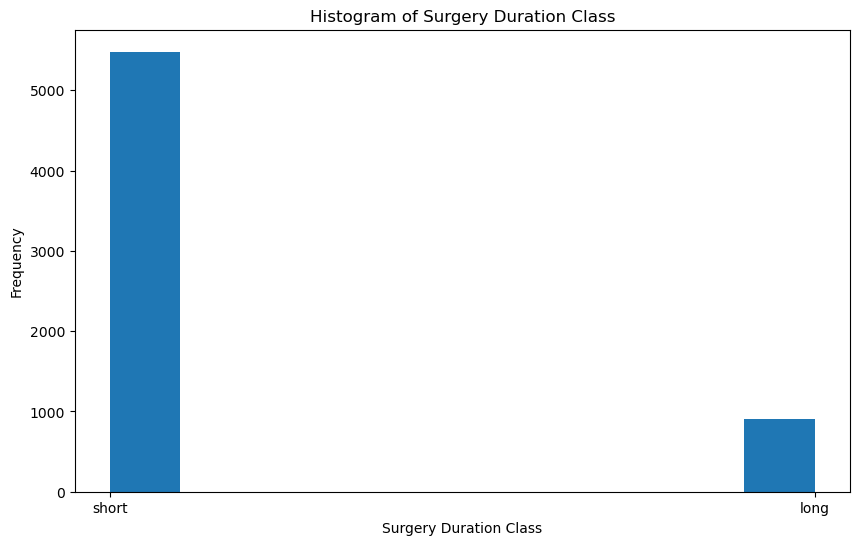

Mean of op_duration: 8159.127739511584
Variance of op_duration: 36841271.19989899


D:\Anaconda\Lib\site-packages\numpy\linalg\linalg.py:2550: RuntimeWarning: overflow encountered in scalar add
  ret = add.reduce(absx, axis=axis, keepdims=keepdims)


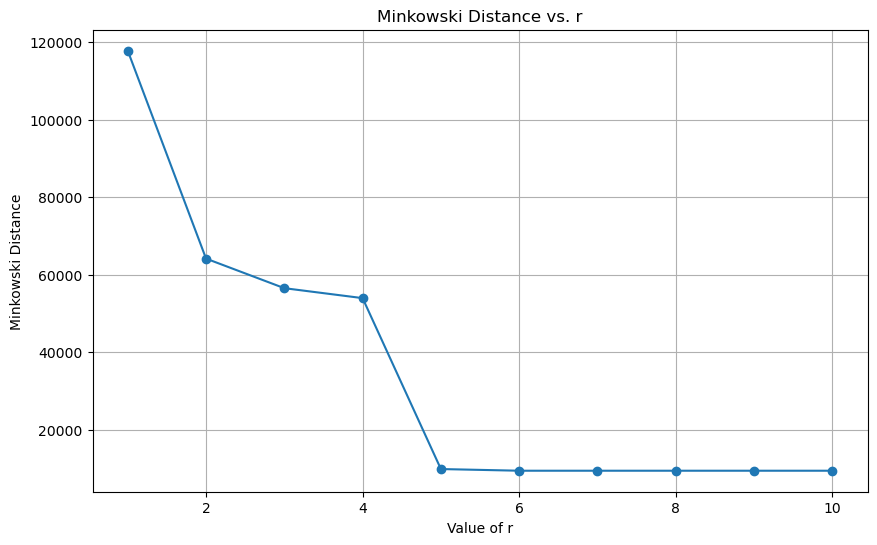

Minkowski distances for r from 1 to 10: [117811.0, 64137.335468508514, 56503.709769658635, 53935.79443507079, 9806.178406471668, 9373.998094423356, 9373.99999810418, 9374.00000000014, 9373.999999999995, 9374.000000000005]
Shape of X_train: (4471, 3)
Shape of X_test: (1917, 3)
Shape of y_train: (4471,)
Shape of y_test: (1917,)
KNeighborsClassifier model fitted.
Accuracy of the model: 0.9984350547730829
Predictions for X_test: ['short' 'short' 'short' ... 'short' 'long' 'short']


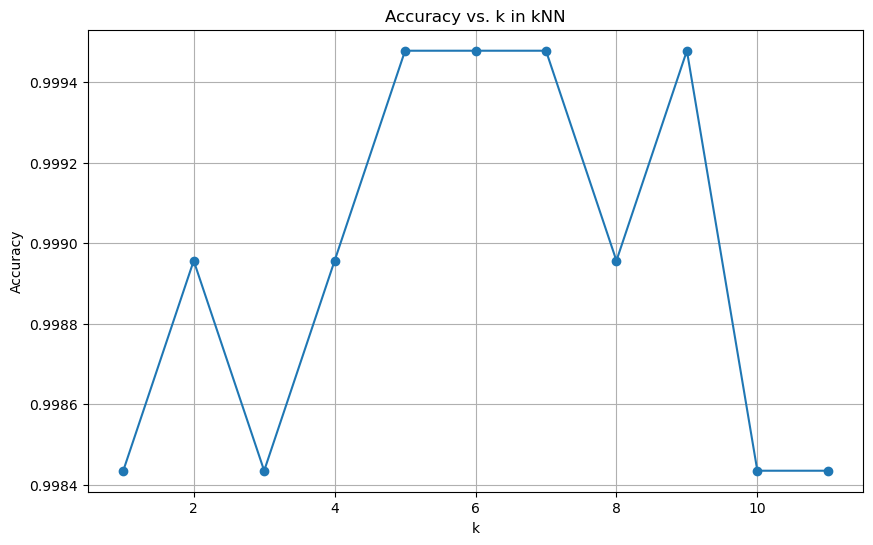

Confusion Matrix - Training Data:
 [[ 640    1]
 [   1 3829]]
Confusion Matrix - Test Data:
 [[ 263    3]
 [   0 1651]]

Training Data:
Precision: 0.9984399375975039
Recall: 0.9984399375975039
F1-score: 0.9984399375975039

Test Data:
Precision: 1.0
Recall: 0.9887218045112782
F1-score: 0.9943289224952742


In [6]:
def main():
    

    # Call a1 and pass dfCases
    distance, height_mean, weight_mean, height_std, weight_std = a1(dfCases)
    print("Distance between height and weight centroids:", distance, "cm")
    print("Height centroid:", height_mean, "cm")
    print("Weight centroid:", weight_mean, "kg")
    print("Height spread:", height_std, "cm")
    print("Weight spread:", weight_std, "kg")

    # Call a2 and pass dfCases
    mean_duration, var_duration = a2(dfCases)
    print("Mean of op_duration:", mean_duration)
    print("Variance of op_duration:", var_duration)

    # Call a3 and pass dfCases
    minkowski_distances = a3(dfCases)
    print("Minkowski distances for r from 1 to 10:", minkowski_distances)

    # Call a4 and pass dfCases
    X_train, X_test, y_train, y_test = a4(dfCases)
    print("Shape of X_train:", X_train.shape)
    print("Shape of X_test:", X_test.shape)
    print("Shape of y_train:", y_train.shape)
    print("Shape of y_test:", y_test.shape)

    # Call a5, pass X_train and y_train
    neigh = a5(X_train, y_train)
    print("KNeighborsClassifier model fitted.")

    # Call a6, pass neigh, X_test, and y_test
    accuracy = a6(neigh, X_test, y_test)
    print("Accuracy of the model:", accuracy)

    # Call a7, pass neigh and X_test
    y_pred = a7(neigh, X_test)
    print("Predictions for X_test:", y_pred)

    # Call a8, pass X_train, y_train, X_test, y_test
    a8(X_train, y_train, X_test, y_test)

    # Call a9, pass neigh, X_train, X_test, y_train, and y_test
    precision_train, recall_train, f1_train, precision_test, recall_test, f1_test = a9(neigh, X_train, X_test, y_train, y_test)

    print("\nTraining Data:")
    print("Precision:", precision_train)
    print("Recall:", recall_train)
    print("F1-score:", f1_train)

    print("\nTest Data:")
    print("Precision:", precision_test)
    print("Recall:", recall_test)
    print("F1-score:", f1_test)

if __name__ == "__main__":
    
    main()